## Projeto Prático 4

**Universidade do Estado do Amazonas**  
**Escola Superior de Tecnologia**  
**Professora:** Elloá B. Guedes  
**Alunos:** Juliany Raiol, Raí Soledade, Richardson Souza  
**Disciplina:** Redes Neurais Artificiais

## Aprendizado de Máquina com tarefa de classificação aplicado no dataset  de variedades de trigo


## Introdução

Três variedades de trigo (Kama, Rosa e Canadian) possuem sementes muito parecidas,
entretanto diferentes. Um grupo de pesquisadores poloneses coletou 70 amostras de cada
tipo e, usando uma técnica particular de raio-X, coletou medidas geométricas destas
sementes, a citar: área, perímetro, compactude, comprimento, largura, coeficiente de
assimetria e comprimento do sulco da semente.

In [1]:
# Módulos utilizados no projeto

import pandas as pd
from pandas.tools.plotting import parallel_coordinates
import matplotlib.pyplot as plt

## 1. Carregando o conjunto de dados

In [2]:
names = ["Area", "Perimeter", "Compactness", "Length", "Width", "Asymmetry", "Groove", "Seed"]

df = pd.read_csv('../../data/seeds_dataset.txt', delim_whitespace=True, names = names)

## 2. Caracterização do conjunto de dados

### 2.1. Informações gerais

Visualizando as 10 primeiras linhas do DataFrame, podemos observar que:
1. O conjunto de dados é composto por oito atributos de entrada.  
2. Não existe dados faltantes, assim como descrito no repositório do conjunto de dados
3. Para construir os dados, sete parâmetros geométricos de grãos de trigo foram medidos.
4. Para cada semente são apresentado os valores para os atributos: Area, Perimeter, Compactness, Length(comprimento da amêndoa), Width(largura da amêndoa), Asymmetry, Groove(comprimento do sulco do núcleo) e Seed, que indica o tipo correspondente de amêndoas pertencentes a três variedades deferentes de trigo: Kama(1), Rosa(2) e Canadian(3), 70 elementos de cada, e corresponde ao atributo alvo.

In [3]:
print("Dimensões do dataset", df.shape)

Dimensões do dataset (210, 8)


In [4]:
df.columns # mostra o nome das colunas do conjunto de dados

Index(['Area', 'Perimeter', 'Compactness', 'Length', 'Width', 'Asymmetry',
       'Groove', 'Seed'],
      dtype='object')

In [5]:
df.head(10) # Imprime as 10 primeiras linhas do conjunto de dados

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Seed
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [6]:
df.tail() # Imprime as 5 últimas linhas do conjunto de dados

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Seed
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [7]:
print(df.groupby('Seed').size()) # Agrupa a coluna referente ao atributo alvo

Seed
1    70
2    70
3    70
dtype: int64


### 2.2. Características dos atributos

Analisando os valores que um atributo pode assumir(tipo) consideramos que:
1. Todos os atributos quantitativos.
2. E, por serem resultado de medições de parâmetros geométricos e estarem representados por valores reais, todos os atributos preditivos são também contínuos e o atributo alvo é discreto pois contêm um número finito.

| Atributo | Classificação |
| ---: | :--- |
| Area | Quantitativo contínuo |
| Perimeter | Quantitativo contínuo |
| Compactness | Quantitativo contínuo |
| Length | Quantitativo contínuo |
| Width | Quantitativo contínuo |
| Asymmetry | Quantitativo contínuo |
| Groove | Quantitativo contínuo |
| Seed | Quantitativo discreto |

In [8]:
df.dtypes # mostra os tipos de dados presentes no conjunto de dados

Area           float64
Perimeter      float64
Compactness    float64
Length         float64
Width          float64
Asymmetry      float64
Groove         float64
Seed             int64
dtype: object

In [9]:
df.isnull().any() # verifica se há valores nulos no dataset

Area           False
Perimeter      False
Compactness    False
Length         False
Width          False
Asymmetry      False
Groove         False
Seed           False
dtype: bool

### 2.3. Escala dos atributos  
Analisando os valores que um atributo pode assumir(escala) consideramos que:
1. Todos os atributos preditivos são racionais, pois carregam mais informação. Existe uma escala de razão entre os atributos.
2. Já o atributo alvo, por carregar uma menor quantidade de informação e por não existir uma relação de ordem entre seus valores, consideramos nominal. São trẽs valores nominais ou classes(1, 2 e 3) que representam as três variedades diferentes de trigo: Kama, Rosa e Canadian.

| Atributo | Classificação |
| ---: | :--- |
| Area | Racional |
| Perimeter | Racional |
| Compactness | Racional |
| Length | Racional |
| Width | Racional |
| Asymmetry | Racional |
| Groove | Racional |
| Seed | Nominal |

### 3. Exploração dos dados

Para uma facilidade no processo de análise, foi criado dataframes de cada tipo de semente. Dessa forma, foram gerados 3: kama, rosa e canadian. 

In [10]:
kama     = df[df['Seed']==1]
rosa     = df[df['Seed']==2]
canadian = df[df['Seed']==3]

> Dados gerais da semente do tipo <strong>Kama</strong>

In [11]:
kama.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Seed
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214,1.0
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699,0.0
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000,1.0
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500,1.0
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000,1.0
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500,1.0
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000,1.0


> Dados gerais da semente do tipo <strong>Rosa</strong>

In [12]:
rosa.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Seed
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600,2.0
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934,0.0
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000,2.0
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500,2.0
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500,2.0
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750,2.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,2.0


> Dados gerais da semente do tipo <strong>Canadian</strong>

In [13]:
canadian.describe()

,Area,Perimeter,Compactness,Length,Width,Asymmetry,Groove,Seed
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400,3.0
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000,3.0
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000,3.0
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500,3.0
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500,3.0
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000,3.0


Fazendo uma análise da descrição de cada tipo de semente, podemos ver que a média do atributo **Area** é bem distinta entre os três tipos de semente.  
O atributo **Perimeter** e **Asymmetry** tem uma distinção mais discreta entre os três tipos. Porém, a média **Perimeter** da semente Rosa em relação aos tipos Kama e Canadian é bem diferenciado. 

Abaixo isolamos esses três atributos para melhor visualização:

#### MEDIDAS DE LOCALIDADE (MÉDIA, MEDIANA E QUARTIS E PERCETIS)

1 - Kama
2 - Rosa
3 - Canadian

In [14]:
gb = df.groupby('Seed')[['Area','Perimeter', 'Asymmetry']]
gb.mean()

,Area,Perimeter,Asymmetry
Seed,,,
1,14.334429,14.294286,2.667403
2,18.334286,16.135714,3.644800
3,11.873857,13.247857,4.788400


Mas, como já sabemos, a média tem uma sensibilidade aos **outliers**. Então, vamos visualizar a mediana desses atributos Area, Perimeter e Asymmtry.

In [15]:
gb.median()

,Area,Perimeter,Asymmetry
Seed,,,
1,14.355,14.32,2.5455
2,18.720,16.21,3.6095
3,11.835,13.25,4.8390


Vendo a mediana dos atributos acima, ainda mantemos a mesma conclusão da análise feita com a média. Mesmo assim, a mediana não elimina os **outliers** apenas minimiza sua presença.

In [16]:
gb.std()

,Area,Perimeter,Asymmetry
Seed,,,
1,1.215704,0.576583,1.173901
2,1.439496,0.616995,1.181868
3,0.723004,0.340196,1.336465


Os desvios padrões com valores acima de 1, indicam maior dispersão dos dados. Isso é visto com maior entoação no atributo Asymmetry em todos as sementes disponíveis no dataset. 

### 4. Visualização dos dados

### 4.1.  Histogramas

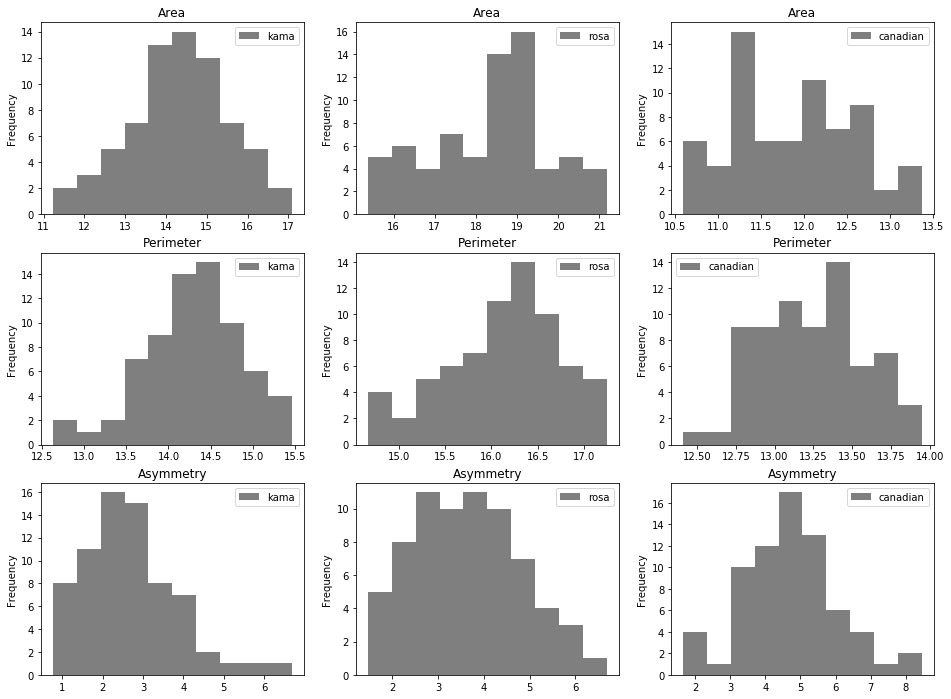

In [17]:
fig,ax=plt.subplots(3,3,figsize=(16, 12))

# Histograma do atributo Area
kama.Area.plot(kind="hist", ax=ax[0][0],label="kama",color ='k',alpha=0.5,fontsize=10)
rosa.Area.plot(kind="hist", ax=ax[0][1],label="rosa",color='k',alpha=0.5,fontsize=10)
canadian.Area.plot( kind="hist",ax=ax[0][2],label="canadian",color='k',alpha=0.5,fontsize=10)

kama.Perimeter.plot(kind="hist", ax=ax[1][0],label="kama",color ='k',alpha=0.5,fontsize=10)
rosa.Perimeter.plot(kind="hist", ax=ax[1][1],label="rosa",color='k',alpha=0.5,fontsize=10)
canadian.Perimeter.plot( kind="hist",ax=ax[1][2],label="canadian",color='k', alpha=0.5,fontsize=10)

kama.Asymmetry.plot(kind="hist", ax=ax[2][0],label="kama",color ='k', alpha=0.5,fontsize=10)
rosa.Asymmetry.plot(kind="hist", ax=ax[2][1],label="rosa",color='k',alpha=0.5,fontsize=10)
canadian.Asymmetry.plot( kind="hist",ax=ax[2][2],label="canadian",color='k',alpha=0.5,fontsize=10)

ax[0][0].set(title='Area')
ax[0][1].set(title='Area')
ax[0][2].set(title='Area')
ax[1][0].set(title='Perimeter')
ax[1][1].set(title='Perimeter')
ax[1][2].set(title='Perimeter')
ax[2][0].set(title='Asymmetry')
ax[2][1].set(title='Asymmetry')
ax[2][2].set(title='Asymmetry')

ax[0][0].legend()
ax[0][1].legend()
ax[0][2].legend()
ax[1][0].legend()
ax[1][1].legend()
ax[1][2].legend()
ax[2][0].legend()
ax[2][1].legend()
ax[2][2].legend()

plt.savefig('histograma.png')
plt.show()

A distribuição dos valores em um conjunto de dados está associada ao valor da obliquidade. 

Quando visualizamos o histograma do atributo "Area", as sementes do tipo "Rosa" e "Canadian" apresentam distribuições do tipo multimodal, onde há o aparecimento de vários picos. Existe uma quantidade maior de valores não arrendondados nesses cenários. Por outro lado, a "Kama" mostra um frequência assimétrica, diferente das demais.

Em "Perimeter", as distribuições tendem a se centralizar, entretanto, ainda existe a presença de picos isolados.

No atributo "Asymmetry", a semente do tipo "Rosa" apresenta um gráfico do tipo "Platô", ou seja, há diversas misturas de distribuições com médias diferentes. A "Kama" é assimétrico e distorcido à direita, indica a ocorrência de altos valores com baixa frequência. "Canadian" continua a apresentar um gráfico multimodal, com a presença de outliers.

### 4.2. BOXPLOT

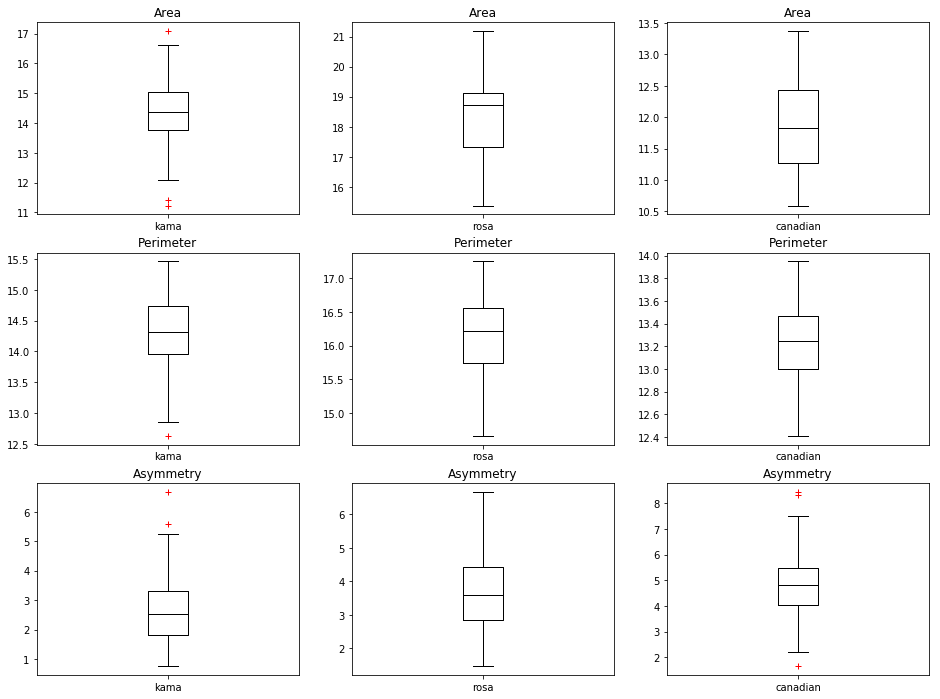

In [20]:
fig,ax=plt.subplots(3,3,figsize=(16, 12))

# boxplot do atributo Area
kama.Area.plot(kind="box", ax=ax[0][0],label="kama",color ='k',sym='r+', fontsize=10)
rosa.Area.plot(kind="box", ax=ax[0][1],label="rosa",color='k',sym='r+', fontsize=10)
canadian.Area.plot( kind="box",ax=ax[0][2],label="canadian",color='k',sym='r+', fontsize=10)

# boxplot do atributo Perimeter
kama.Perimeter.plot(kind="box", ax=ax[1][0],label="kama",color ='k',sym='r+',fontsize=10)
rosa.Perimeter.plot(kind="box", ax=ax[1][1],label="rosa",color='k',sym='r+',fontsize=10)
canadian.Perimeter.plot( kind="box",ax=ax[1][2],label="canadian",color='k',sym='r+',fontsize=10)

# boxplot do atributo Asymmetry
kama.Asymmetry.plot(kind="box", ax=ax[2][0],label="kama",color ='k',sym='r+',fontsize=10)
rosa.Asymmetry.plot(kind="box", ax=ax[2][1],label="rosa",color='k',sym='r+',fontsize=10)
canadian.Asymmetry.plot( kind="box",ax=ax[2][2],label="canadian",color='k',sym='r+',fontsize=10)

ax[0][0].set(title='Area')
ax[0][1].set(title='Area')
ax[0][2].set(title='Area')
ax[1][0].set(title='Perimeter')
ax[1][1].set(title='Perimeter')
ax[1][2].set(title='Perimeter')
ax[2][0].set(title='Asymmetry')
ax[2][1].set(title='Asymmetry')
ax[2][2].set(title='Asymmetry')

plt.savefig('boxplot.png')
plt.show()

### 4.3. SCATTER PLOT

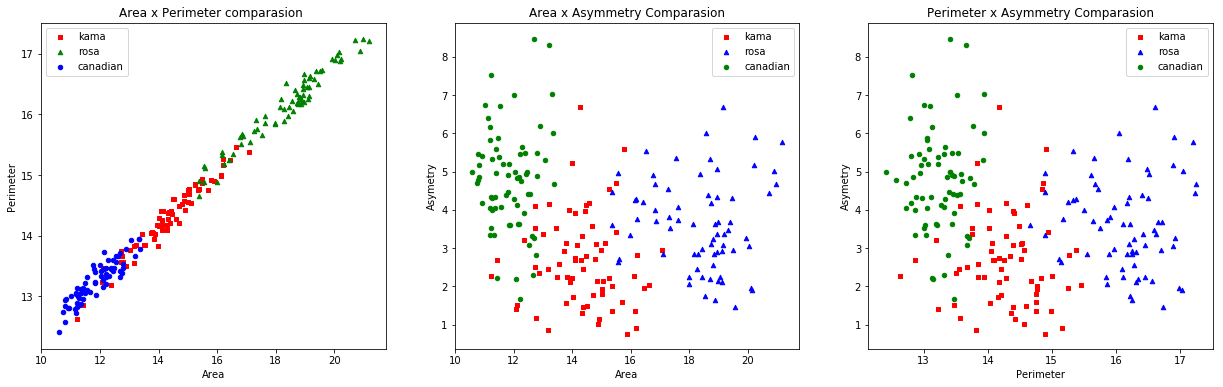

In [24]:
fig, ax = plt.subplots(1,3,figsize=(21, 6))

kama.plot(x="Area", y="Perimeter", kind="scatter",ax=ax[0],label='kama',color='r',marker='s')
rosa.plot(x="Area",y="Perimeter",kind="scatter",ax=ax[0],label='rosa',color='g',marker='^')
canadian.plot(x="Area", y="Perimeter", kind="scatter", ax=ax[0], label='canadian', color='b',marker='o')

kama.plot(x="Area", y="Asymmetry", kind="scatter",ax=ax[1],label='kama',color='r',marker='s')
rosa.plot(x="Area",y="Asymmetry",kind="scatter",ax=ax[1],label='rosa',color='b',marker='^')
canadian.plot(x="Area", y="Asymmetry", kind="scatter", ax=ax[1], label='canadian', color='g',marker='o')

kama.plot(x="Perimeter", y="Asymmetry", kind="scatter",ax=ax[2],label='kama',color='r',marker='s')
rosa.plot(x="Perimeter",y="Asymmetry",kind="scatter",ax=ax[2],label='rosa',color='b',marker='^')
canadian.plot(x="Perimeter", y="Asymmetry", kind="scatter", ax=ax[2], label='canadian', color='g',marker='o')

ax[0].set(title='Area x Perimeter comparasion ', ylabel='Perimeter')
ax[1].set(title='Area x Asymmetry Comparasion',  ylabel='Asymetry')
ax[2].set(title='Perimeter x Asymmetry Comparasion',  ylabel='Asymetry')
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

Os gráficos de dispersão referem-se como os dados estão dispostos. É também possível visualizar a correlação 
entre os atributos analisados.

O gráfico Area x Perimeter ilustra uma relação linear, visto que o valor de X aumenta juntamente com o de Y de maneira linear. A partir desse gráfico, é possível perceber que as sementes do tipo Canadian apresentam "Area" e "Perimeter" menores em relação os demais. 

Outro ponto de destaque é que através dos gráficos Area x Asymmetry e Perimeter x Asymmetry é possível identificar que não há correlação linear evidente entre os atributos. Tendo em vista que esses apresentam maior discrepância entre si. 

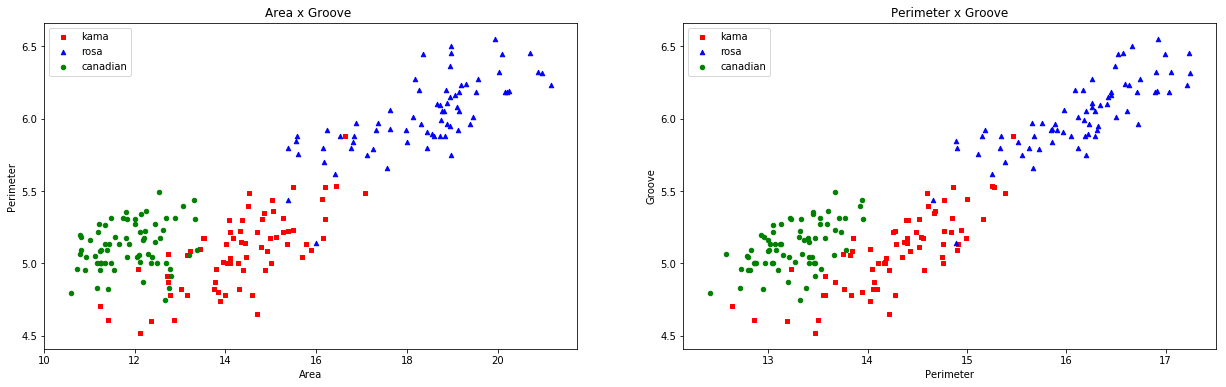

In [26]:
fig, ax = plt.subplots(1,2,figsize=(21, 6))

kama.plot(x="Area", y="Groove", kind="scatter",ax=ax[0],label='kama',color='r',marker='s')
rosa.plot(x="Area",y="Groove",kind="scatter",ax=ax[0],label='rosa',color='b',marker='^')
canadian.plot(x="Area", y="Groove", kind="scatter", ax=ax[0], label='canadian', color='g',marker='o')


kama.plot(x="Perimeter", y="Groove", kind="scatter",ax=ax[1],label='kama',color='r',marker='s')
rosa.plot(x="Perimeter",y="Groove",kind="scatter",ax=ax[1],label='rosa',color='b',marker='^')
canadian.plot(x="Perimeter", y="Groove", kind="scatter", ax=ax[1], label='canadian', color='g',marker='o')

ax[0].set(title='Area x Groove ', ylabel='Perimeter')
ax[1].set(title='Perimeter x Groove',  ylabel='Groove')
ax[0].legend()
ax[1].legend()
plt.show()

Nesse esses é possível visualizar agrupamentos numa mesma região do gráfico.   

### 5. Correlação entre os atributos

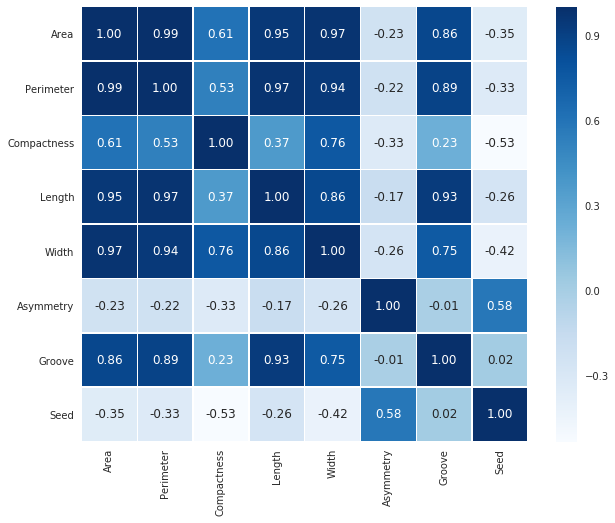

In [41]:
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.iloc[:,0:8].corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax ,cmap="Blues")
plt.savefig('correlation.png')
plt.show()

Como os dados são derivados a partir medições de área e perimetro de cada semente, já é esperado que haja uma correlação entre os atributos de entrada Area, Perimeter, Length, Width e Groove.

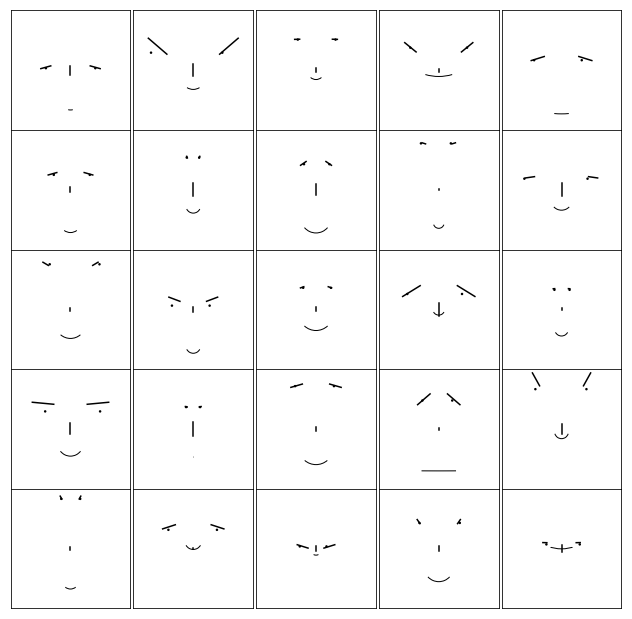

In [4]:
from pylab import *
 
def cface(ax, x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18):
    # x1 = height  of upper face
    # x2 = overlap of lower face
    # x3 = half of vertical size of face
    # x4 = width of upper face
    # x5 = width of lower face
    # x6 = length of nose
    # x7 = vertical position of mouth
    # x8 = curvature of mouth
    # x9 = width of mouth
    # x10 = vertical position of eyes
    # x11 = separation of eyes
    # x12 = slant of eyes
    # x13 = eccentricity of eyes
    # x14 = size of eyes
    # x15 = position of pupils
    # x16 = vertical position of eyebrows
    # x17 = slant of eyebrows
    # x18 = size of eyebrows
     
    # transform some values so that input between 0,1 yields variety of output
    x3 = 1.9*(x3-.5)
    x4 = (x4+.25)
    x5 = (x5+.2)
    x6 = .3*(x6+.01)
    x8 = 5*(x8+.001)
    x11 /= 5
    x12 = 2*(x12-.5)
    x13 += .05
    x14 += .1
    x15 = .5*(x15-.5)
    x16 = .25*x16
    x17 = .5*(x17-.5)
    x18 = .5*(x18+.1)
 
    # top of face, in box with l=-x4, r=x4, t=x1, b=x3
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', linewidth=2)
    ax.add_artist(e)
 
    # bottom of face, in box with l=-x5, r=x5, b=-x1, t=x2+x3
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', linewidth=2)
    ax.add_artist(e)
 
    # cover overlaps
    e = mpl.patches.Ellipse( (0,(x1+x3)/2), 2*x4, (x1-x3), fc='white', ec='none')
    ax.add_artist(e)
    e = mpl.patches.Ellipse( (0,(-x1+x2+x3)/2), 2*x5, (x1+x2+x3), fc='white', ec='none')
    ax.add_artist(e)
     
    # draw nose
    plot([0,0], [-x6/2, x6/2], 'k')
     
    # draw mouth
    p = mpl.patches.Arc( (0,-x7+.5/x8), 1/x8, 1/x8, theta1=270-180/pi*arctan(x8*x9), theta2=270+180/pi*arctan(x8*x9))
    ax.add_artist(p)
     
    # draw eyes
    p = mpl.patches.Ellipse( (-x11-x14/2,x10), x14, x13*x14, angle=-180/pi*x12, facecolor='white')
    ax.add_artist(p)
     
    p = mpl.patches.Ellipse( (x11+x14/2,x10), x14, x13*x14, angle=180/pi*x12, facecolor='white')
    ax.add_artist(p)
 
    # draw pupils
    p = mpl.patches.Ellipse( (-x11-x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
    p = mpl.patches.Ellipse( (x11+x14/2-x15*x14/2, x10), .05, .05, facecolor='black')
    ax.add_artist(p)
     
    # draw eyebrows
    plot([-x11-x14/2-x14*x18/2,-x11-x14/2+x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    plot([x11+x14/2+x14*x18/2,x11+x14/2-x14*x18/2],[x10+x13*x14*(x16+x17),x10+x13*x14*(x16-x17)],'k')
    
fig = figure(figsize=(11,11))
                                                
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,aspect='equal')
    cface(ax, .9, *rand(17))
    ax.axis([-1.2,1.2,-1.2,1.2])
    ax.set_xticks([])
    ax.set_yticks([])
 
fig.subplots_adjust(hspace=0, wspace=0)